In [135]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact


In [66]:
def problema(x,w,b=0):
    return np.dot(x,w) + b

def sigmoide(x):
    return 1/ ( 1 + np.exp(-x))

def costo(y,Y):
    return (y - Y)**2

def dCdw(y,Y):
    return 2*(y-Y)*(y)*(1-y)

In [67]:
def maquinita(x,w,Y,LR,epochs):
    y_h = []
    C_h = []
    for epoch in range(epochs):
        y = sigmoide(problema(x,w))
        C = costo(y,Y)
        correccion = dCdw(y,Y)*LR
        w = w - correccion
        C_h.append(C)
        y_h.append(y)
    print(y)
    grafiquita(C_h,"r","Costo")
#     grafiquita(y_h,"b","y")
    
    
    

def grafiquita(y,color,etiqueta):
    plt.figure(figsize=(10,4))
    plt.plot(y,color+"*")
    plt.plot(y,color+"-")
    plt.ylabel(etiqueta)
    plt.xlabel("Epoch")
    plt.show()

    

0.7099999999998304


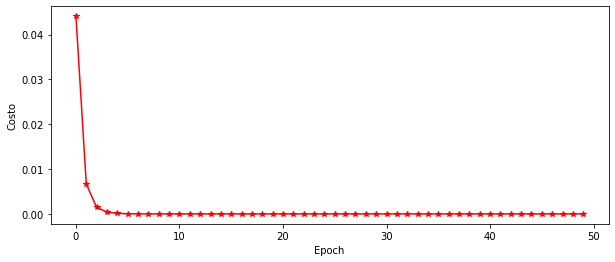

In [68]:
maquinita(x=[3,2],w=[0,0],Y=0.71,LR=1,epochs=50)

1.0


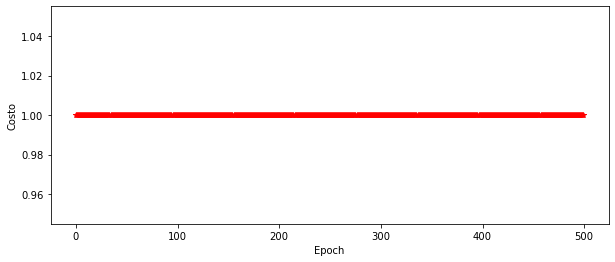

In [69]:
maquinita(x=[3,2],w=[20,3],Y=0,LR=1,epochs=500)

In [96]:
w1  = np.linspace(-2,2,100)
w2  = np.linspace(-2,2,100)

w1,w2

(array([-2.        , -1.95959596, -1.91919192, -1.87878788, -1.83838384,
        -1.7979798 , -1.75757576, -1.71717172, -1.67676768, -1.63636364,
        -1.5959596 , -1.55555556, -1.51515152, -1.47474747, -1.43434343,
        -1.39393939, -1.35353535, -1.31313131, -1.27272727, -1.23232323,
        -1.19191919, -1.15151515, -1.11111111, -1.07070707, -1.03030303,
        -0.98989899, -0.94949495, -0.90909091, -0.86868687, -0.82828283,
        -0.78787879, -0.74747475, -0.70707071, -0.66666667, -0.62626263,
        -0.58585859, -0.54545455, -0.50505051, -0.46464646, -0.42424242,
        -0.38383838, -0.34343434, -0.3030303 , -0.26262626, -0.22222222,
        -0.18181818, -0.14141414, -0.1010101 , -0.06060606, -0.02020202,
         0.02020202,  0.06060606,  0.1010101 ,  0.14141414,  0.18181818,
         0.22222222,  0.26262626,  0.3030303 ,  0.34343434,  0.38383838,
         0.42424242,  0.46464646,  0.50505051,  0.54545455,  0.58585859,
         0.62626263,  0.66666667,  0.70707071,  0.7

In [97]:
S = []
x = [3,2]
Y = 0.71
for W1 in w1:
    for W2 in w2:
        w = [W1,W2]
        y = sigmoide(problema(x,w))
        C = costo(y,Y)
        S.append([W1,W2,C])
S = np.array(S)
S

array([[-2.        , -2.        ,  0.50403554],
       [-2.        , -1.95959596,  0.50403011],
       [-2.        , -1.91919192,  0.50402423],
       ...,
       [ 2.        ,  1.91919192,  0.08406905],
       [ 2.        ,  1.95959596,  0.08407146],
       [ 2.        ,  2.        ,  0.08407367]])

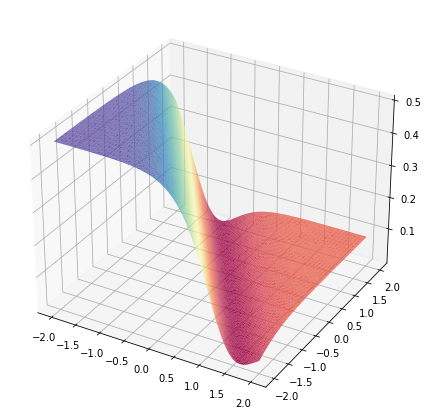

In [98]:
fig = plt.figure(figsize=(16,8))
tri = mtri.Triangulation(S[:,0],S[:,1])
ax = fig.add_subplot(1,2,1,projection="3d")

ax.plot_trisurf(S[:,0],S[:,1],S[:,2], triangles=tri.triangles,
               cmap=plt.cm.Spectral)
# ax.view_init(0,90)


In [107]:

epochs = 20
x = [3,2]
w = [0,0]
P_h = []
LR = 1
Y = 0.72

for itera in range(epochs):
  y = sigmoide(problema(x,w))
  C = (y - Y)**2
  P_h.append([w[0],w[1],C])
  correccion = dCdW(y,Y)*LR
  w = w - correccion

P_h = np.array(P_h)
print(len(P_h))
P_h

TypeError: problema() missing 1 required positional argument: 'b'

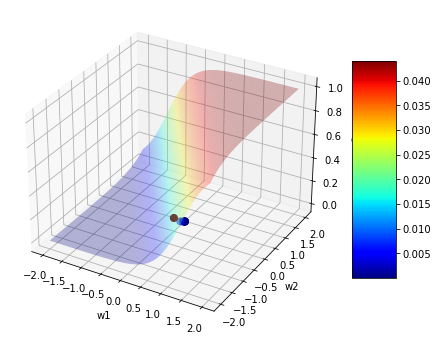

In [102]:

# L = 100
# w1 = np.linspace(-2,2,L)
# w2 = np.linspace(-2,0,L)
# x1 = 3
# x2 = 2
# Y  = 0.71
S = []
for W1 in w1:
    for W2 in w2:
        P = sigmoide( problema(x,[W1,W2]))
        S.append([W1,W2,P])

S = np.array(S)


fig = plt.figure(figsize=(16,8))


tri = mtri.Triangulation(S[:,0], S[:,1])

ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('C')


superficie = ax.plot_trisurf(S[:,0], S[:,1], S[:,2],alpha=0.3,cmap="jet")
# superficie = ax.scatter(S[:,0], S[:,1], S[:,2],alpha=0.6,s=8)



puntos = ax.scatter(P_h[:,0],P_h[:,1],P_h[:,2],c=P_h[:,2],cmap="jet",s=50)
fig.colorbar(puntos, shrink=0.5, aspect=5)    

# ax.view_init(20,80)
# ax.view_init(60,35)
plt.show()

In [103]:

def problema(x,w,b):
    return np.dot(x,w) + b

def sigmoide(x):
    return 1/(1 + np.exp(-x))

def costo(y,Y):
    return (y-Y)**2

def punto(x,w,b,Y):
    y = sigmoide(problema(x,w,b))
    C = costo(y,Y)
    return C

In [149]:
def resuelve_grafique(x,w,b,Y,epochs,LR,ang1,ang2):
  # epochs = 20
  # x      = [3,2]
  # w      = [0,-1]
  # LR     = 1
  # Y      = 0.72
  # b      = 0
    P_h    = []
    for epoch in range(epochs):
        y = sigmoide(problema(x,w,b))
        C = costo(y,Y)
        P_h.append([w[0],w[1],C])
        correcion =  dCdW(y,Y)*LR
        w = w - correcion

    print("w =",w)
    print("C =",C)
    print("y =",y)
    P_h = np.array(P_h)
    L = 50
    
    w1 = np.linspace(-2,2,L)
    w2 = np.linspace(-2,2,L)
    x1 = x[0]
    x2 = x[1]

    S = []
    for W1 in w1:
        for W2 in w2:
            P = punto([x1,x2],[W1,W2],b,Y)
            S.append([W1,W2,P])

    S = np.array(S)
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(1, 2, 1, projection='3d')

    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_zlabel('C')


    tri = mtri.Triangulation(S[:,0], S[:,1])
    ax.plot_trisurf(S[:,0],S[:,1],S[:,2],triangles=tri.triangles,
                    alpha=0.5,cmap="hot")

    puntos = ax.scatter(P_h[:,0],P_h[:,1],P_h[:,2],c=P_h[:,2],s=50)

    ax.view_init(ang1,ang2)
    plt.show()

w = [ 0.58889232 -0.41110768]
C = 7.96599241201158e-24
y = 0.7199999999971776


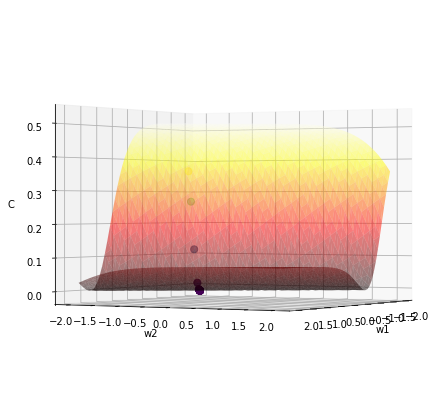

In [150]:
resuelve_grafique(x=[3,2],w=[0,-1],b=0,Y=0.72,epochs=50,LR=1,
                  ang1=0,ang2=30)

In [152]:
def interacciona(ang2):
    resuelve_grafique(x=[3,2],w=[-2,-1.5],b=0,Y=0.72,epochs=5000,LR=1,
                      ang1=90,ang2=ang2)
    
interact(interacciona,ang2=(0,180,10))

interactive(children=(IntSlider(value=90, description='ang2', max=180, step=10), Output()), _dom_classes=('widâ€¦

<function __main__.interacciona(ang2)>